In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import warnings

# Exploratory Data Analysis

In [97]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [98]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [99]:
# y label is Rating
# there are a mix of label and categorical columns
# columns Invoice ID, Date,Time and payment could be dropped

In [100]:
df.shape

(1000, 17)

In [42]:
#there are 1000 observations and 17 features

In [101]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
#some columns require encoding as they are categorical

In [ ]:
# Step 2: Summary statistics of numeric columns

In [102]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
#there may be some outliers in columns total and cogs

In [103]:
df.isnull().sum()*100/df.shape[0]

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [ ]:
# there are no missing values in the data

In [ ]:
# Step 3: Value counts of category columns

In [104]:
df.select_dtypes(include=object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [30]:
df.select_dtypes(include=object).columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [48]:
for i in ['Branch', 'City', 'Customer type', 'Gender',
       'Product line']:
    print(i)
    print(df[i].value_counts())
    print('\n')


Branch
A    340
B    332
C    328
Name: Branch, dtype: int64


City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64


Gender
Female    501
Male      499
Name: Gender, dtype: int64


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64




In [64]:
df['Rating'].groupby([df['Gender']]).mean()

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

In [65]:
df['Rating'].groupby([df['Branch']]).mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [66]:
df['Rating'].groupby([df['City']]).mean()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

In [67]:
df['Rating'].groupby([df['Customer type']]).mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

In [68]:
pd.crosstab(index=df.Gender,columns=df.City,margins=True)

City,Mandalay,Naypyitaw,Yangon,All
Gender,,,,
Female,162,178,161,501
Male,170,150,179,499
All,332,328,340,1000


In [71]:
pd.crosstab(index=df.City,columns=df['Product line'],margins=True)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,All
City,,,,,,,
Mandalay,55,62,50,53,50,62,332
Naypyitaw,55,65,66,52,45,45,328
Yangon,60,51,58,47,65,59,340
All,170,178,174,152,160,166,1000


In [297]:
# Step 4: Data Visualization

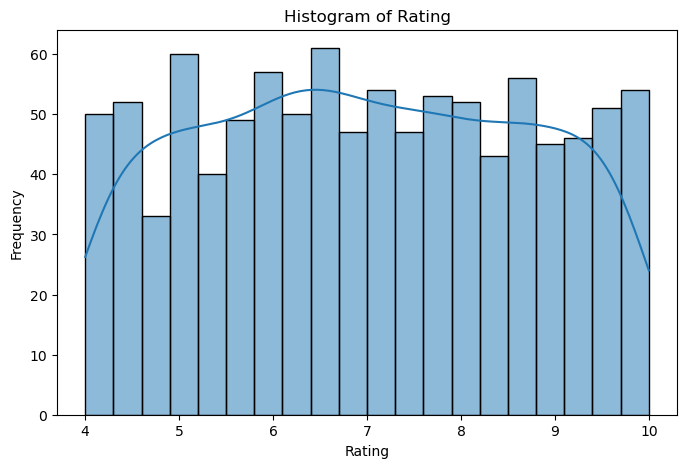

In [50]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

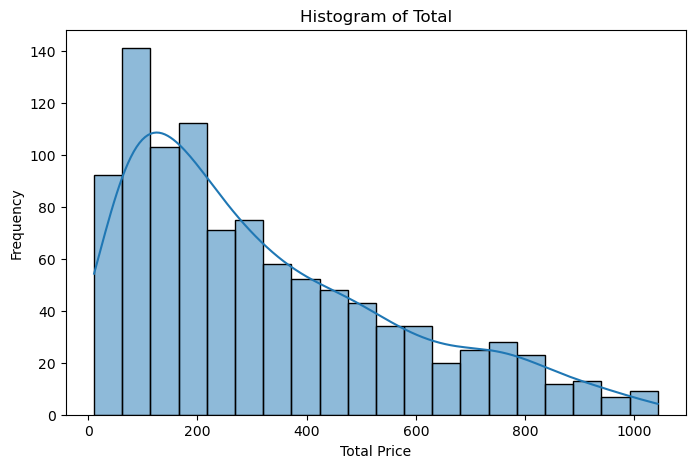

In [106]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Total'], bins=20, kde=True)
plt.title('Histogram of Total')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# uniform distributed with right skewed

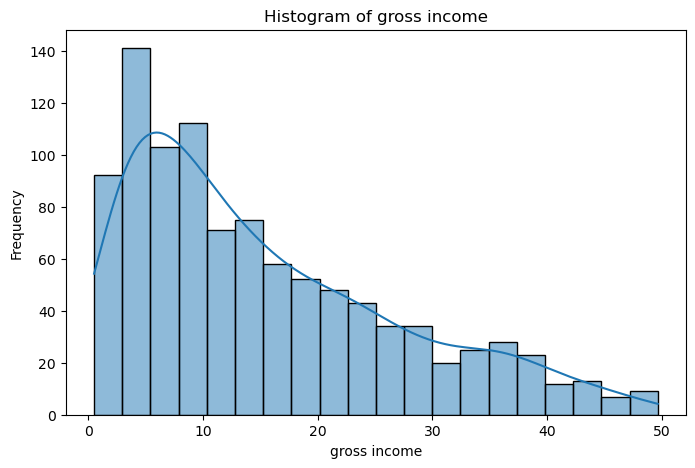

In [107]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['gross income'], bins=20, kde=True)
plt.title('Histogram of gross income')
plt.xlabel('gross income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# uniform distributed with right skewed

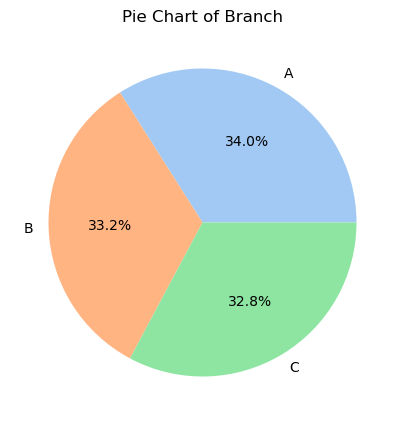

In [53]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Branch'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Branch')
plt.ylabel('')
plt.show()

In [ ]:
# Branches are unifromly distributed

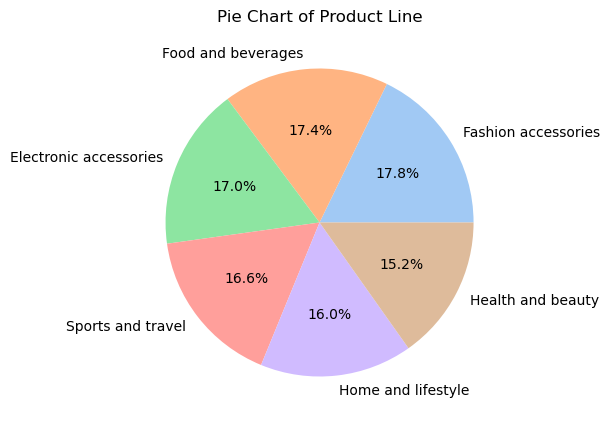

In [54]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Product line'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Product Line')
plt.ylabel('')
plt.show()

In [ ]:
# Product Line are unifromly distributed

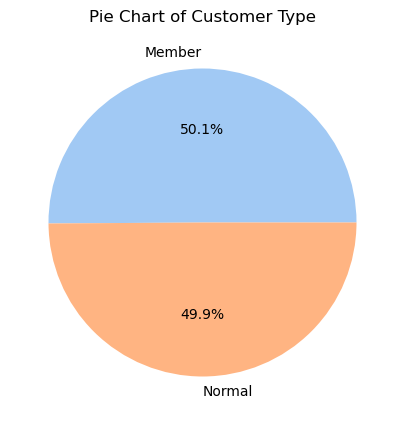

In [55]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Customer Type')
plt.ylabel('')
plt.show()

In [ ]:
# Customer type are unifromly distributed

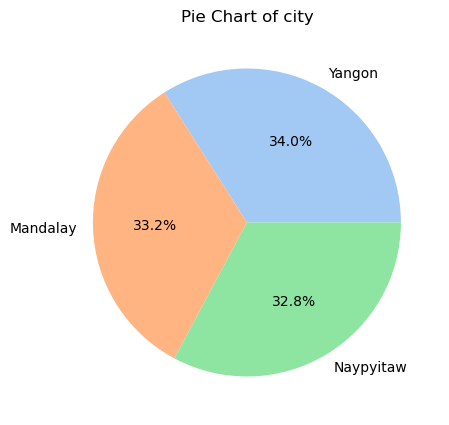

In [57]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of city')
plt.ylabel('')
plt.show()

In [ ]:
# City are unifromly distributed

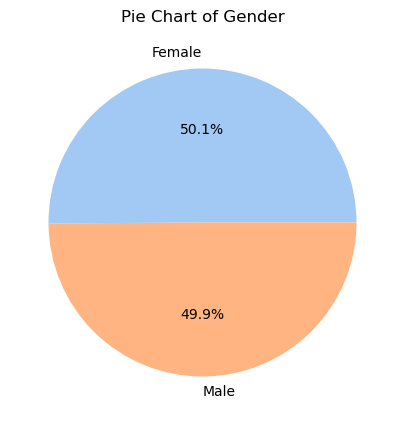

In [58]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Gender')
plt.ylabel('')
plt.show()

In [ ]:
# Gender is unifromly distributed

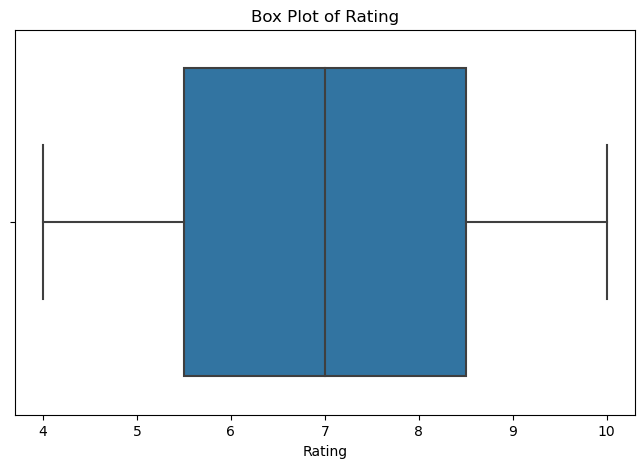

In [59]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.show()

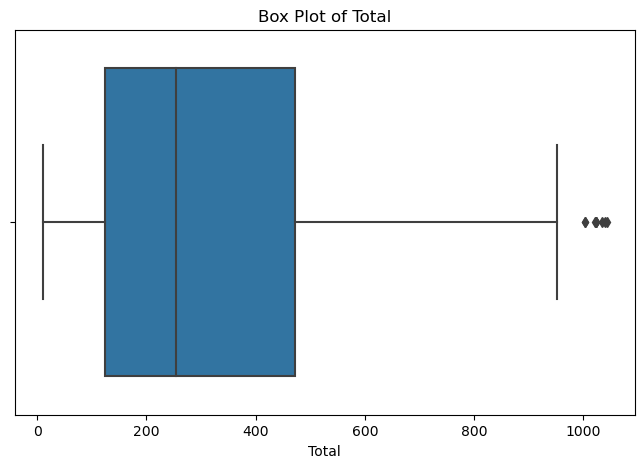

In [60]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total'])
plt.title('Box Plot of Total')
plt.xlabel('Total')
plt.show()

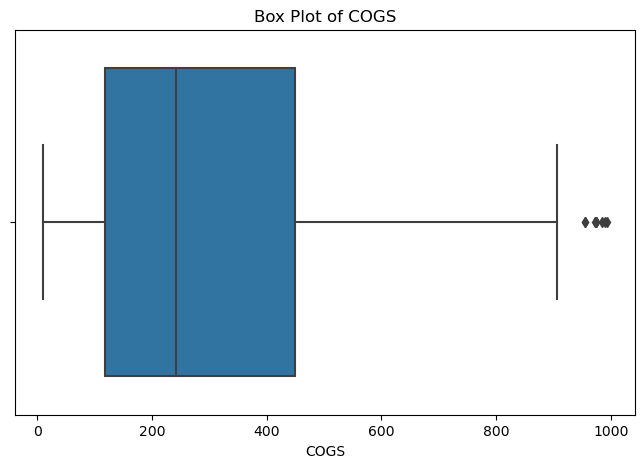

In [61]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cogs'])
plt.title('Box Plot of COGS')
plt.xlabel('COGS')
plt.show()

<Axes: xlabel='cogs', ylabel='Rating'>

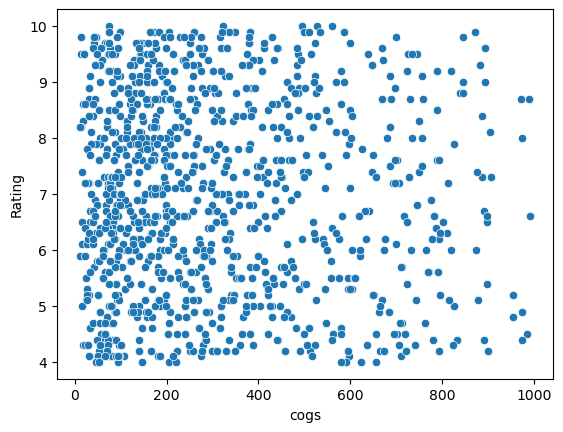

In [108]:
sns.scatterplot(x=df.cogs, y=df.Rating)

<Axes: xlabel='cogs', ylabel='Rating'>

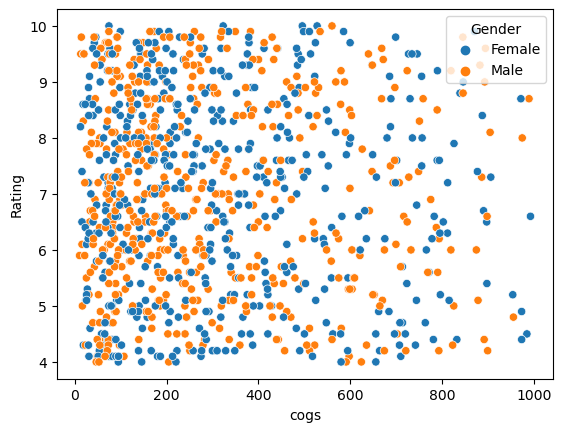

In [112]:
sns.scatterplot(x=df.cogs, y=df.Rating,hue=df.Gender)

In [308]:
# Step 5: Observations from data visualization
# - columns Invoice ID, Date,Time and payment could be dropped
# - Outliers require rows to be trimmed
# - the catrgorical data has to be encoded


# Data Preprocessing

In [113]:
# Step 1: columns Invoice ID, Date,Time and payment could be dropped
df = df.drop(columns=['Invoice ID', 'Date','Time','Payment'])

In [114]:
df.shape

(1000, 13)

In [115]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [116]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]


In [117]:
outlier_remover(df_num,df)

In [118]:
df.shape

(1000, 13)

<Axes: xlabel='Rating'>

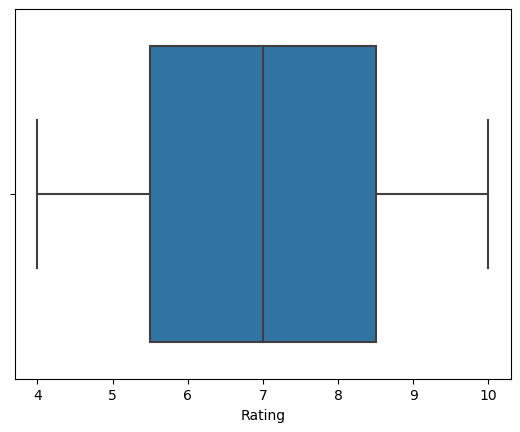

In [119]:
sns.boxplot(x=df['Rating'])

In [120]:
X = df.drop('Rating', axis=1)
y = df.Rating
X.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085


In [121]:
X_num = X.select_dtypes('number')
X_num.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085


In [122]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Branch,City,Customer type,Gender,Product line
0,A,Yangon,Member,Female,Health and beauty
1,C,Naypyitaw,Normal,Female,Electronic accessories
2,A,Yangon,Normal,Male,Home and lifestyle
3,A,Yangon,Member,Male,Health and beauty
4,A,Yangon,Normal,Male,Sports and travel


In [123]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [124]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [125]:
X_num_scaled.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,0.507256,0.501111,0.302613,0.302613,0.302613,0.0,0.302613
std,0.294778,0.324826,0.238268,0.238268,0.238268,0.0,0.238268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.253616,0.222222,0.110220,0.110220,0.110220,0.0,0.110220
50%,0.502336,0.444444,0.235636,0.235636,0.235636,0.0,0.235636
75%,0.754951,0.777778,0.446400,0.446400,0.446400,0.0,0.446400
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [126]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [127]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [128]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((1000, 23), (1000, 7), (1000, 16))

In [129]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Unit price                             0
Quantity                               0
Tax 5%                                 0
Total                                  0
cogs                                   0
gross margin percentage                0
gross income                           0
Branch_A                               0
Branch_B                               0
Branch_C                               0
City_Mandalay                          0
City_Naypyitaw                         0
City_Yangon                            0
Customer type_Member                   0
Customer type_Normal                   0
Gender_Female                          0
Gender_Male                            0
Product line_Electronic accessories    0
Product line_Fashion accessories       0
Product line_Food and beverages        0
Product line_Health and beauty         0
Product line_Home and lifestyle        0
Product line_Sports and travel         0
dtype: 

In [130]:
X.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Branch_A,Branch_B,Branch_C,...,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.507256,0.501111,0.302613,0.302613,0.302613,0.0,0.302613,0.340000,0.332000,0.32800,...,0.501000,0.499000,0.501000,0.499000,0.170000,0.178000,0.174000,0.152000,0.160000,0.166000
std,0.294778,0.324826,0.238268,0.238268,0.238268,0.0,0.238268,0.473946,0.471167,0.46972,...,0.500249,0.500249,0.500249,0.500249,0.375821,0.382704,0.379299,0.359201,0.366789,0.372267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253616,0.222222,0.110220,0.110220,0.110220,0.0,0.110220,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.502336,0.444444,0.235636,0.235636,0.235636,0.0,0.235636,0.000000,0.000000,0.00000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.754951,0.777778,0.446400,0.446400,0.446400,0.0,0.446400,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(800, 23)
(200, 23)
(800,)
(200,)


In [46]:
# Step 9: Observations after preprocessing
# - Columns 'Invoice ID', 'Date','Time','Payment' are removed
# - outliers were removed
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [71]:
# Train the model with different K values and calculate MAPE scores using CV

In [133]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [134]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [135]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [136]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = find_mape(predictions, y_test_fold)
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [140]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 9 and minimum test score is 0.25081687219124754


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 9 and minimum test score is 0.23777411465138046


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 9 and minimum test score is 0.21695046660415174


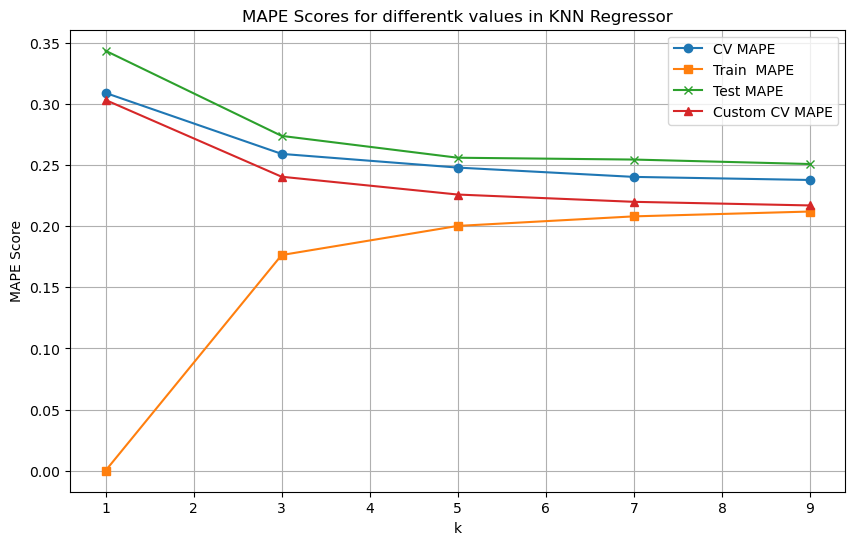

In [141]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [78]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [79]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
#calling custom functions for KNN
test_mape_scores=[]
train_mape_scores=[]
for k in k_list:
    y_pred_test =knn(X_train,X_test,y_train,k)
    y_pred_train =knn(X_train,X_train,y_train,k)
    test_mape = find_mape(y_test,y_pred_test)
    test_mape_scores.append(test_mape)
    train_mape = find_mape(y_train,y_pred_train)
    train_mape_scores.append(train_mape)


In [ ]:
best_k = k_list[np.argmin(test_mape_scores)]
print("best k with Custom KNN implementation is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))

In [ ]:
#plot with custom KNN function
plt.figure(figsize=(10, 6))
#plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_list, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_list, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Inference:
# - best k with holdout test is 9 
# - best k with cross validation is 9 
